In [66]:
import pandas as pd

In [67]:
# Loaded the datasets
customers = pd.read_csv("F:/ZEOTAP_DataScience_Assignment/Customers.csv")
transactions = pd.read_csv("F:/ZEOTAP_DataScience_Assignment/Transactions.csv")

In [68]:
# Merged datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [26]:
# Created total spending per customer and region
customer_spending = merged_data.groupby(['CustomerID','Region'])['TotalValue'].sum().reset_index()
print("Customer Spending Before Normalizing: \n", customer_spending.head())

# Normalizing the feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customer_spending['TotalValue'] = scaler.fit_transform(customer_spending[['TotalValue']])
print("Customer Spending After Normalizing: \n", customer_spending.head())

Customer Spending Before Normalizing: 
   CustomerID         Region  TotalValue
0      C0001  South America     3354.52
1      C0002           Asia     1862.74
2      C0003  South America     2725.38
3      C0004  South America     5354.88
4      C0005           Asia     2034.24
Customer Spending After Normalizing: 
   CustomerID         Region  TotalValue
0      C0001  South America    0.308942
1      C0002           Asia    0.168095
2      C0003  South America    0.249541
3      C0004  South America    0.497806
4      C0005           Asia    0.184287


In [27]:
# Created additional features for clustering
features = customers.merge(customer_spending, on='CustomerID')
print(features.head())

  CustomerID        CustomerName       Region_x  SignupDate       Region_y  \
0      C0001    Lawrence Carroll  South America  2022-07-10  South America   
1      C0002      Elizabeth Lutz           Asia  2022-02-13           Asia   
2      C0003      Michael Rivera  South America  2024-03-07  South America   
3      C0004  Kathleen Rodriguez  South America  2022-10-09  South America   
4      C0005         Laura Weber           Asia  2022-08-15           Asia   

   TotalValue  
0    0.308942  
1    0.168095  
2    0.249541  
3    0.497806  
4    0.184287  


In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=30)
features['Cluster'] = kmeans.fit_predict(features[['TotalValue']])

# Evaluating using DB Index
db_index = davies_bouldin_score(features[['TotalValue']], features['Cluster'])
print(f'DB Index: {db_index}')

DB Index: 0.5494920132693868


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

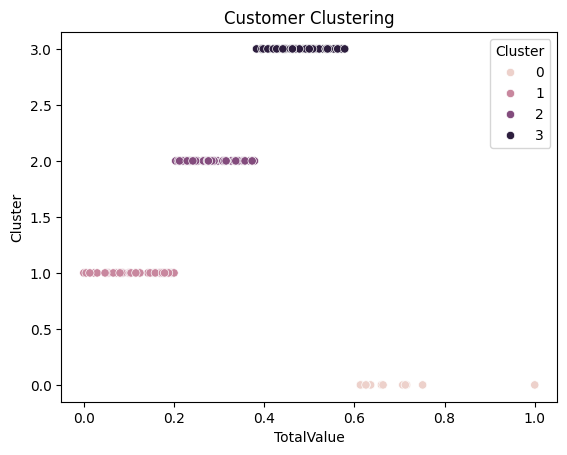

In [61]:
# Visualizing clusters
sns.scatterplot(data=features, x='TotalValue', y='Cluster', hue='Cluster')
plt.title('Customer Clustering')
plt.show()